In [7]:
# =================================================
# Milestone 2 Phase 1

# Nama  : Muhammad Adam Alhafizh
# Batch : CODA-RMT-003

# Program ini dibuat untuk menyelesaikan suatu masalah dengan menganalisa data menggunakan statistik dan membuat dashboard untuk memvisualisasikan data untuk menyelesaikan masalah.
# =================================================


Link dataset: https://www.kaggle.com/code/justinlgl20/house-ds-project
Link tableau: https://public.tableau.com/views/P1M2_MuhammadAdam/Dashboard1?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

# Identifikasi masalah

Latar Belakang:

Anda bekerja di suatu perusahaan real estate, yang dimana perusahaan tersebut sedang mengalami penurunan dalam penjualan di properti rumah. Anda diminta untuk melakukan analisis sehingga perusahaan dapat menentukan rencana apa yang dapat dilakukan untuk memberikan solusi agar penjualan properti rumah dapat meningkat.

Tujuan Bisnis:

Perusahaan ingin anda untuk mengidentifikasi faktor apa saja yang memiliki pengaruh terhadap harga rumah agar perusahaan dapat menentukan harga yang paling cocok untuk pasar.

Analisis SMART

S:  Melakukan analisis untuk menentukan kriteria rumah yang paling banyak terjual sebagai bekal untuk melakukan investasi dan penentuan harga properti

M:  Mengukur jumlah total ruangan dan luas dari rumah yang paling banyak terjual

A:  Melakukan analisis kriteria rumah yang paling banyak terjual dengan analisa statistik

R:  Mendapatkan gambaran kasar tentang kriteria rumah yang paling banyak diminati pembeli dari hasil analisa untuk pengambilan keputusan saat investasi ke depannya

T:  Hasil dari analisis akan digunakan untuk 6 bulan ke depan

Problem statement:  Perusahaan ingin mengetahui kriteria rumah yang paling banyak diminati dengan melakukan analisis statistik terhadap faktor yang mungkin menjadi faktor yang menarik pembeli yang nantinya akan digunakan untuk menentukan harga properti yang paling cocok dan menyusun strategi agar tingkat penjualan dapat mengalami peningkatan.

# Breaking Down the Problem

Metode 5W + 1H:

    - Bagaimana perbandingan tingkat penjualan dari tiap tahun?
    
    - Faktor apa yang paling berpengaruh terhadap harga rumah?

    - Berapa total luas rumah yang paling diminati dari rumah yang sudah terjual?

    - Berapa persentase peminat yang memberli berdasarkan grade?

    - Bagaimana tren penjualan dari tiap bulan?

    - Bagaimana perbedaan harga rumah dengan jumlah kamar tidur tertinggi dan rumah dengan jumlah kamar mandi tertinggi?


# Data Loading

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt
from scipy.stats import ttest_ind

Link dataset: https://www.kaggle.com/code/justinlgl20/house-ds-project

In [9]:
# Melakukan loading data
df = pd.read_csv('D:\Codingan\Hacktive8\Hacktive8 Challenges\Milestone2-Phase-1\kc_house_data.csv')
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
# Melakukan pengecekkan dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Data Cleaning

Missing value

In [11]:
# Melakukan pengecekkan row yang memiliki nilai kosong
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
id,id,0.0
date,date,0.0
price,price,0.0
bedrooms,bedrooms,0.0
bathrooms,bathrooms,0.0
sqft_living,sqft_living,0.0
sqft_lot,sqft_lot,0.0
floors,floors,0.0
waterfront,waterfront,0.0
view,view,0.0


Duplicated row

In [12]:
# Mengecek apakah terdapat data yang duplikat
total_duplicated = df.duplicated().sum()
total_duplicated

0

Mengecek konsistensi tipe data

In [13]:
# Melakukan pengecekkan dataframe
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [14]:
# Melakukan pengecekkan dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [15]:
# Mengubah tipe data di kolom date menjadi datetime
df["date"] = pd.to_datetime(df["date"], errors='coerce')

In [16]:
# Mengubah tipe data pada masing-masing kolom yang tidak konsisten
df = df.astype({"id": "object", "bathrooms": "int64", "floors": 'int64'})

In [17]:
# Melakukan pengecekkan dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  object        
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  int64         
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  int64         
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [18]:
# Melakukan pengecekkan dataframe
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [19]:
# df['year'] = df['date'].dt.year
df['year'] = df['date'].dt.year

Menghapus kolom yang tidak digunakan

In [20]:
# Menghapus kolom yang tidak digunakan dalam analisis
df = df.drop(['sqft_lot15', 'sqft_living15', 'long', 'lat', 'zipcode', 'yr_renovated', 'yr_built', 'sqft_basement', 'sqft_above', 'condition', 'view', 'waterfront', 'id'], axis=1)

In [21]:
# Melakukan pengecekkan dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         21613 non-null  datetime64[ns]
 1   price        21613 non-null  float64       
 2   bedrooms     21613 non-null  int64         
 3   bathrooms    21613 non-null  int64         
 4   sqft_living  21613 non-null  int64         
 5   sqft_lot     21613 non-null  int64         
 6   floors       21613 non-null  int64         
 7   grade        21613 non-null  int64         
 8   year         21613 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(6)
memory usage: 1.4 MB


# EDA

Q1: Bagaimana perbandingan tingkat penjualan dari tiap tahun?

In [22]:
# Melakukan grouping dari kolom tahun dan harga rumah
sales_and_price = df.groupby('year')['price'].count().reset_index()
sales_and_price

,year,price
0,2014,14633
1,2015,6980


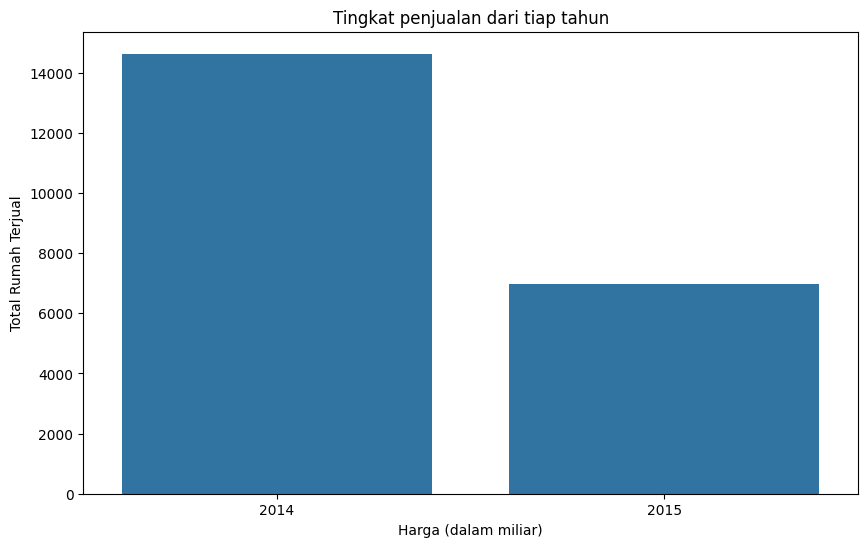

In [23]:
# Melakukan plotting untuk tingkat penjualan dari tiap tahun
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='price', data=sales_and_price)
plt.title('Tingkat penjualan dari tiap tahun')
plt.xlabel('Harga (dalam miliar)')
plt.ylabel('Total Rumah Terjual')
plt.show()

Q2: Faktor apa yang paling berpengaruh terhadap harga rumah?

In [24]:
# Membuat dataframe yang berisi kolom dengan value numerik
numeric_cols = df.copy()
numeric_cols = numeric_cols.drop(['date'], axis=1)
numeric_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  int64  
 3   sqft_living  21613 non-null  int64  
 4   sqft_lot     21613 non-null  int64  
 5   floors       21613 non-null  int64  
 6   grade        21613 non-null  int64  
 7   year         21613 non-null  int32  
dtypes: float64(1), int32(1), int64(6)
memory usage: 1.2 MB


In [25]:
# Melakukan pengecekkan apakah data terdistribusi secara normal di tiap kolom
alpha = 0.05
for column in numeric_cols.columns:
    stat, p = stats.shapiro(numeric_cols[column])
    print(f'Hasil Shapiro-Wilk Test dari kolom {column} adalah:')
    print(f"Nilai uji normalitas: {stat:.4f}")
    print(f"Nilai p-value: {p}")
    if p > alpha:
        print(f'Data dari kolom {column} terdistribusi normal.\n')
    else:
        print(f'Data dari kolom {column} tidak terdistribusi normal.\n')

Hasil Shapiro-Wilk Test dari kolom price adalah:
Nilai uji normalitas: 0.7120
Nilai p-value: 0.0
Data dari kolom price tidak terdistribusi normal.

Hasil Shapiro-Wilk Test dari kolom bedrooms adalah:
Nilai uji normalitas: 0.8489
Nilai p-value: 0.0
Data dari kolom bedrooms tidak terdistribusi normal.

Hasil Shapiro-Wilk Test dari kolom bathrooms adalah:
Nilai uji normalitas: 0.7966
Nilai p-value: 0.0
Data dari kolom bathrooms tidak terdistribusi normal.

Hasil Shapiro-Wilk Test dari kolom sqft_living adalah:
Nilai uji normalitas: 0.9150
Nilai p-value: 0.0
Data dari kolom sqft_living tidak terdistribusi normal.

Hasil Shapiro-Wilk Test dari kolom sqft_lot adalah:
Nilai uji normalitas: 0.2329
Nilai p-value: 0.0
Data dari kolom sqft_lot tidak terdistribusi normal.

Hasil Shapiro-Wilk Test dari kolom floors adalah:
Nilai uji normalitas: 0.6828
Nilai p-value: 0.0
Data dari kolom floors tidak terdistribusi normal.

Hasil Shapiro-Wilk Test dari kolom grade adalah:
Nilai uji normalitas: 0.8952


C:\Users\adama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [26]:
# Membuat heatmap untuk menentukan ketergantungan data
df_heatmap = df.corr()
df_heatmap

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,year
date,1.000000,-0.004357,-0.016800,-0.029478,-0.034559,0.006313,-0.019079,-0.039912,0.853452
price,-0.004357,1.000000,0.308350,0.510072,0.702035,0.089661,0.237211,0.667434,0.003576
bedrooms,-0.016800,0.308350,1.000000,0.467452,0.576671,0.031703,0.155643,0.356967,-0.009838
bathrooms,-0.029478,0.510072,0.467452,1.000000,0.697875,0.085310,0.484822,0.606631,-0.021698
sqft_living,-0.034559,0.702035,0.576671,0.697875,1.000000,0.172826,0.353321,0.762704,-0.029038
sqft_lot,0.006313,0.089661,0.031703,0.085310,0.172826,1.000000,-0.008951,0.113621,0.005468
floors,-0.019079,0.237211,0.155643,0.484822,0.353321,-0.008951,1.000000,0.472608,-0.019465
grade,-0.039912,0.667434,0.356967,0.606631,0.762704,0.113621,0.472608,1.000000,-0.030387
year,0.853452,0.003576,-0.009838,-0.021698,-0.029038,0.005468,-0.019465,-0.030387,1.000000


<Axes: >

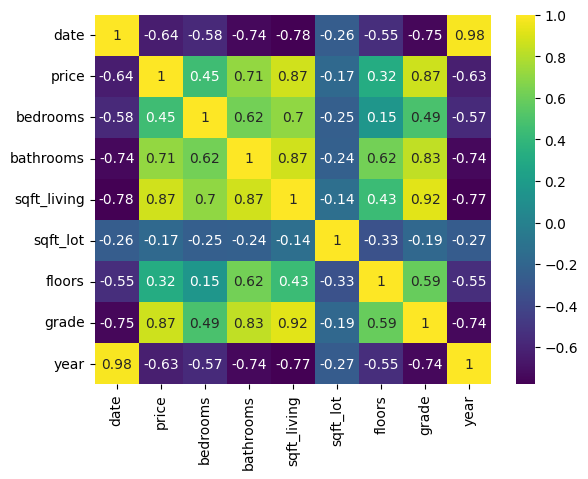

In [27]:
# Melakukan plotting heatmap
sns.heatmap(df_heatmap.corr(), cmap='viridis', annot=True)

Dari heatmap di atas, dapat dilihat bahwa faktor yang memiliki pengaruh terbesar adalah total luas rumah

H0 = Tidak ada korelasi antar data luas rumah dan harga
H1 = Terdapat korelasi antar data luas rumah dan harga

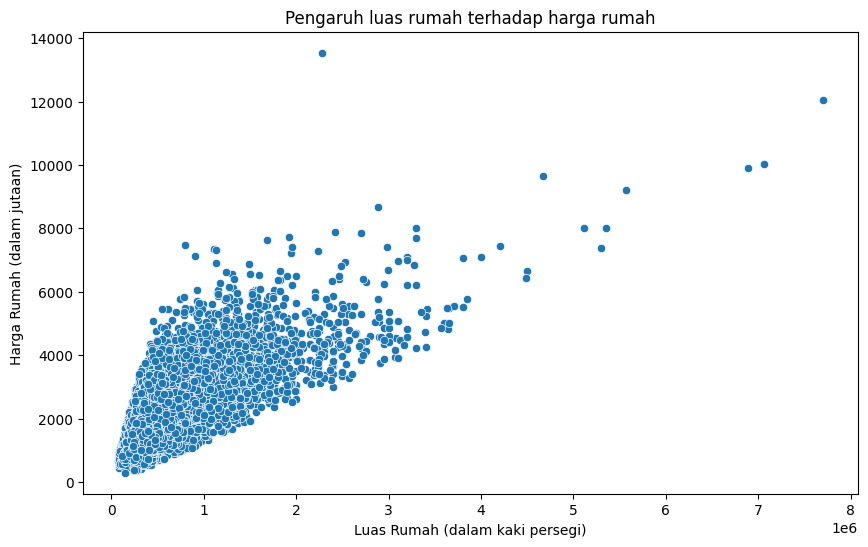

In [28]:
# Melakukan plotting grafik ketergantungan row banyaknya terjual dengan harga produk
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df,x='price', y='sqft_living')
plt.title('Pengaruh luas rumah terhadap harga rumah')
plt.xlabel('Luas Rumah (dalam kaki persegi)')
plt.ylabel('Harga Rumah (dalam jutaan)')
plt.show()

Dikarenakan data terdistribusi normal, maka teknik uji korelasi yang dipakai adalah Pearson.

In [29]:
# Melakukan perhitungan nilai korelasi dan p-value
corr_r, pval_p = stats.pearsonr(df['sqft_living'], df['price'])
print(f"r-correlation: {corr_r:.2f}, p-value: {pval_p}")

r-correlation: 0.70, p-value: 0.0


Dikarenakan P-value < Tingkat signifikansi, maka H1 diterima, yang berarti terdapat pengaruh antara data luas rumah dan harga 

Q3: Berapa total luas rumah yang paling diminati dari rumah yang sudah terjual?
Bagaimana tingkat minat pembeli

In [30]:
# Membuat dataframe baru dengan menggroupby kolom harga rumah dan luas rumah
sqft_living_count = df.groupby('sqft_living')['price'].count().reset_index()
sqft_living_count = sqft_living_count.rename(columns={"price": "total_sold"})
sqft_living_count

,sqft_living,total_sold
0,290,1
1,370,1
2,380,1
3,384,1
4,390,2
...,...,...
1033,9640,1
1034,9890,1
1035,10040,1
1036,12050,1


In [31]:
avg_sqft_living = df["sqft_living"].mean()
print(f"Rata-rata luas rumah yang terjual: {avg_sqft_living}")

Rata-rata luas rumah yang terjual: 2079.8997362698374


In [32]:
# Melakukan pengecekkan nilai skewnes
print(f"Skewness: {df['sqft_living'].skew()}")
if (df['sqft_living'].skew() > 0):
    print("Data terdistribusi positif (right-skewed)")
else:
    print("Data terdistribusi positif (left-skewed)")

Skewness: 1.471555426802092
Data terdistribusi positif (right-skewed)


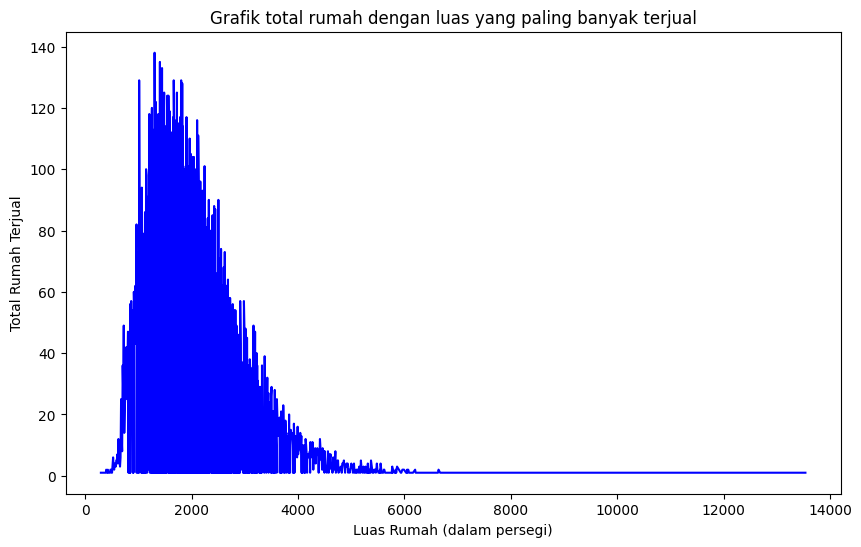

In [33]:
# Melakukan plotting untuk melihat total rumah dengan luas yang paling banyak terjual
plt.figure(figsize=(10, 6))
sns.lineplot(x='sqft_living', y='total_sold', data=sqft_living_count, color='blue')
plt.title('Grafik total rumah dengan luas yang paling banyak terjual')
plt.ylabel('Total Rumah Terjual')
plt.xlabel('Luas Rumah (dalam persegi)')
plt.show()

Q4: Berapa persentase peminat yang memberli berdasarkan grade?

In [34]:
# Membuat kolom baru yang berisi total ruangan di rumah
df["room_total"] = df["bedrooms"] + df["bathrooms"]
room_total_df = df.copy()

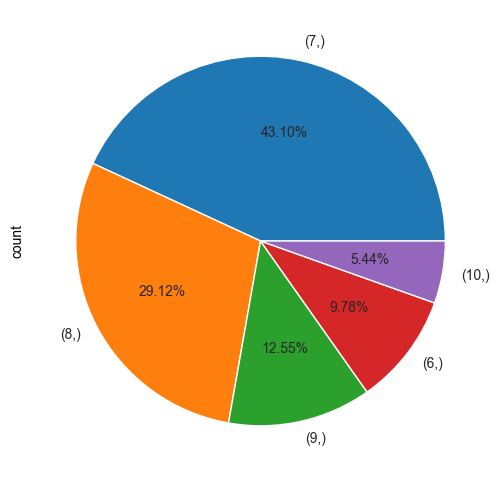

In [35]:
# Mengambil 5 data yang memilki jumnlah penjualan tertinggi dari kolom grade
room_total_df = df[['grade']].value_counts().head(5)

# Melakukan plotting untuk 
fig,ax1 = plt.subplots(figsize=(10, 6))
sns.set_style("whitegrid")
room_total_df.plot(kind='pie', autopct='%.2f%%',ax=ax1)
plt.show()

In [42]:
room_total_df

grade
7        8981
8        6068
9        2615
6        2038
10       1134
Name: count, dtype: int64

Q5: Bagaimana tren penjualan dari tiap bulan?

In [36]:
# Membuat kolom baru yang berisikan bulan penjualan
df['month'] = df['date'].dt.month

# Melakukan plotting tren dari penjualan rumah
linechart1 = df.groupby('month')['month'].value_counts().reset_index()
linechart1

,month,count
0,1,978
1,2,1250
2,3,1875
3,4,2231
4,5,2414
5,6,2180
6,7,2211
7,8,1940
8,9,1774
9,10,1878


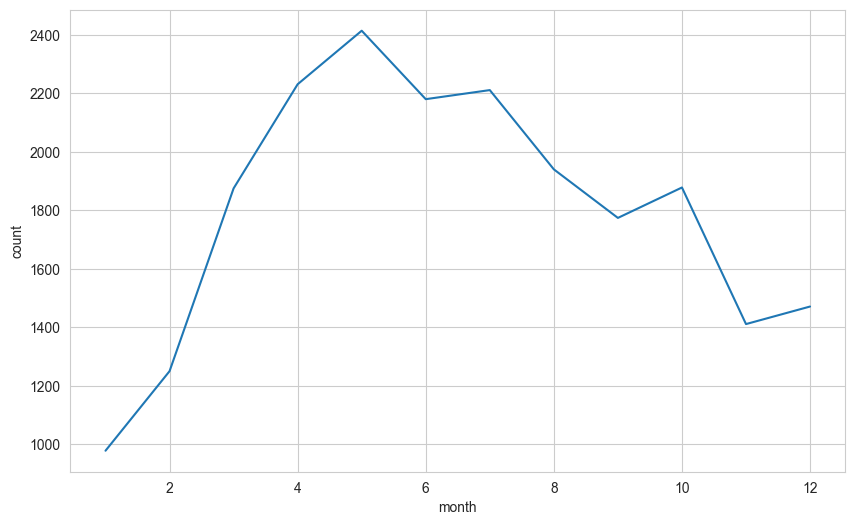

In [37]:
# Melakukan plotting tren penjualan per bulan
plt.figure(figsize=(10, 6))
sns.lineplot(data=linechart1,x="month", y="count")
plt.show()

Q6: Bagaimana perbedaan harga rumah dengan jumlah kamar tidur tertinggi dan rumah dengan jumlah kamar mandi tertinggi?

- H0 = Tingkat kemungkinan terdapat perbedaan antara harga rumah dengan jumlah kamar tidur tertinggi dan rumah dengan jumlah kamar mandi tertinggi sangat kecil
- H1 = Tingkat kemungkinan terdapat perbedaan antara harga rumah dengan jumlah kamar tidur tertinggi dan rumah dengan jumlah kamar mandi tertinggi sangat besar
- Dikarenakan ini merupakan analisa umum, kita akan menggunakan tingkat signifikansi sebesar 5%

In [38]:
# Mengambil nilai maksimal dari kolom bedrooms dan bathrooms
bedrooms_max = df['bedrooms'].max()
bathrooms_max = df['bathrooms'].max()
print(bedrooms_max)
print(bathrooms_max)

33
8


In [39]:
# Mengambil nilai maksimal dari kedua kolom
bedrooms_max_data = df[df['bedrooms'] == bedrooms_max]['price']
bathrooms_max_data = df[df['bathrooms'] == bathrooms_max]['price']

# Hitung statistik dan p-value
t_statistic, p_value = ttest_ind(bedrooms_max_data, bathrooms_max_data)

# Cetak hasil
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Interpertasi hasil
alpha = 0.05
if p_value < alpha:
    print("H1 Diterima, dikanakan nilai P-value < tingkat signifikansi.")
else:
  print("H0 Diterima, dikarenakan nilai P-value > tingkat signifikansi.")

T-Statistic: -0.926743052020248
P-Value: 0.5241933495710838
H0 Diterima, dikarenakan nilai P-value > tingkat signifikansi.


Dikarenakan nilai P-value > dari tingkat signifikansi, dapat disimpulkan bahwa data yang dibandingkan tidak memiliki hubungan yang singnifikan, sehingga dapat disimpulkan bahwa kemungkinan untuk terdapat perbedaan antara harga rumah dengan jumlah kamar tidur tertinggi dan rumah dengan jumlah kamar mandi tertinggi tertinggi sangat kecil.

Mengexport dataset

In [40]:
# Mengecek isi dataframe
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,year,room_total,month
0,2014-10-13,221900.0,3,1,1180,5650,1,7,2014,4,10
1,2014-12-09,538000.0,3,2,2570,7242,2,7,2014,5,12
2,2015-02-25,180000.0,2,1,770,10000,1,6,2015,3,2
3,2014-12-09,604000.0,4,3,1960,5000,1,7,2014,7,12
4,2015-02-18,510000.0,3,2,1680,8080,1,8,2015,5,2


In [41]:
df.to_csv("P1M2_Muhammad Adam.csv")

# Kesimpulan

Dari hasil analisa yang sudah dilakukan sebelumnya, dapat dilihat bahwa komponen-komponen rumah dapat berpengaruh terhadap peluang terjualnya rumah, seperti luas rumah dan penilaian rumah. Selain itu, menentukan harga yang tepat juga merupakan langkah yang penting. Dengan mengetahui kriteria rumah yang paling banyak diminati pembeli, perusahaan bisa merancang strategi untuk investasi ke rumah yang paling cocok dengan kriteria yang sudah diketahui dan bisa menentukan harga yang paling cocok untuk rumah tersebut, sehingga nantinya dapat meningkatkan tingkat penjualan dapat meningkat.

# Actionable recommendation

- Perusahaan bisa merancang strategi penyaringan serta penentuan sebelum melakukan investasi ke suatu rumah sesuai dengan kriteria yang paling banyak diminati yang dilihat dari data-data sebelumnya serta menentukan harga yang cocok untuk pasar.
- Dikarenakan tingkat penjualan paling tinggi dialami pada bulan Mei sampai dengan  Juli, sangat disarankan untuk melakukan investasi sebelum bulan-bulan tersebut datang.